In [13]:
from log_analysis import *

baseline = {'mAP': .383, 'AP@75': .441, 'AP@50': .594, 'LAMR': .45776}

sweeps = {}

sizes = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 'all']
sweeps['fine-tuning'] = df_from_sweep('sweeps/fine-tune', sizes)

sizes = [1, 2, 5, 10, 20, 50, 'all']
sweeps['GPA all'] = df_from_sweep('sweeps/gpa_ppp', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['GPA RoI+cls'] = df_from_sweep('sweeps/gpa_p-p', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100, 'all']
sweeps['GPA-GT all'] = df_from_sweep('sweeps/gpa_pxg', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100, 'all']
sweeps['GPA-GT bbox+cls'] = df_from_sweep('sweeps/gpa_-xg', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV neck 0'] = df_from_sweep('sweeps/adv_0', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV neck 0 pretrained'] = df_from_sweep('sweeps/adv_0_p', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV 0,4'] = df_from_sweep('sweeps/adv_04', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV 0,1,4'] = df_from_sweep('sweeps/adv_014', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV-GT neck 0'] = df_from_sweep('sweeps/adv_g0', sizes)

# sizes = [1, 2, 5, 10, 20, 50, 100]
# sweeps['GPA RoI+cls unsupervised'] = df_from_sweep('sweeps/gpa_p-p_u', sizes)

# sizes = [1, 2, 5]
# sweeps['ADV-GT 0 19²'] = df_from_sweep('sweeps/adv_g0_', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV neck 0 + GPA-GT bbox+cls'] = df_from_sweep('sweeps/adv_0_gpa_-xg', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['GPA RoI+cls unsupervised'] = df_from_sweep('sweeps/gpa_p-p_u', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV neck 0 unsupervised'] = df_from_sweep('sweeps/adv_0_u', sizes)

sizes = [1,2,5,10,20,50,100]
sweeps['fine-tuning MW-18Mar'] = df_from_sweep('sweeps/fine-tune_mw', sizes, alt_pattern=True)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV neck 0 + GPA-GT bbox+cls MW-18Mar'] = df_from_sweep('sweeps/adv_0_gpa_-xg_mw', sizes, alt_pattern=True)

df = pd.concat(sweeps.values(), keys=sweeps.keys()).rename_axis(['setting', None]).reset_index(level=0)
df.replace(['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50'], ['mAP', 'AP@75', 'AP@50'], inplace=True)
df.head()


sweeps/adv_0_gpa_-xg/1c.log does not exist, skipping it ...


,setting,size,split,metric,value
0,fine-tuning,1,a,mAP,0.487
1,fine-tuning,1,b,mAP,0.447
2,fine-tuning,1,c,mAP,0.465
3,fine-tuning,2,a,mAP,0.524
4,fine-tuning,2,b,mAP,0.506


# best models
## overall

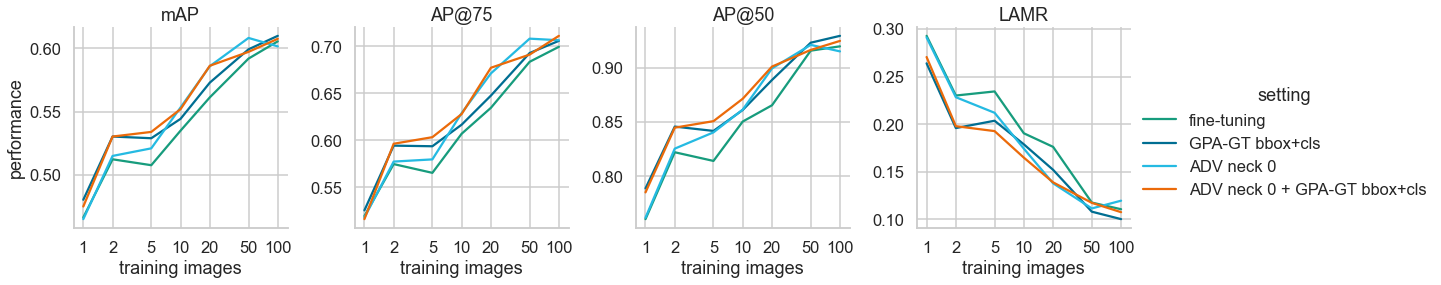

In [59]:
import matplotlib as mpl

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
hue_order = ['fine-tuning', 'GPA-GT bbox+cls', 'ADV neck 0', 'ADV neck 0 + GPA-GT bbox+cls']
g = sb.relplot(
    data=df[(df['setting'].isin(['fine-tuning', 'GPA-GT bbox+cls', 'ADV neck 0', 'ADV neck 0 + GPA-GT bbox+cls']))
            & (df['size'] <= 100)],
    x='size',
    y='value',
    col='metric',
    hue='setting',
    hue_order=hue_order,
    kind='line',
    err_style=None,
    facet_kws={
        'sharey': False,
        'sharex': True
    },
    height=4,
    aspect=1)
# baseline reference line
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.axhline(list(baseline.values())[i], ls='--', c='.5')  #, dashes=(2,1), zorder=0)
#     ax.text(4, list(baseline.values())[i] + (-0.04 if i == 3 else 0.01), 'without fine-tuning', c='.5')
# labels
g.set_xlabels('training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
# g.add_legend({'after fine-tuning': axes[0].lines[0], 'without fine-tuning': axes[0].lines[1]})
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
# g.set_xticklabels(rotation=90)
g.savefig(f'images/sweep_gpa_adv_piropo.svg')

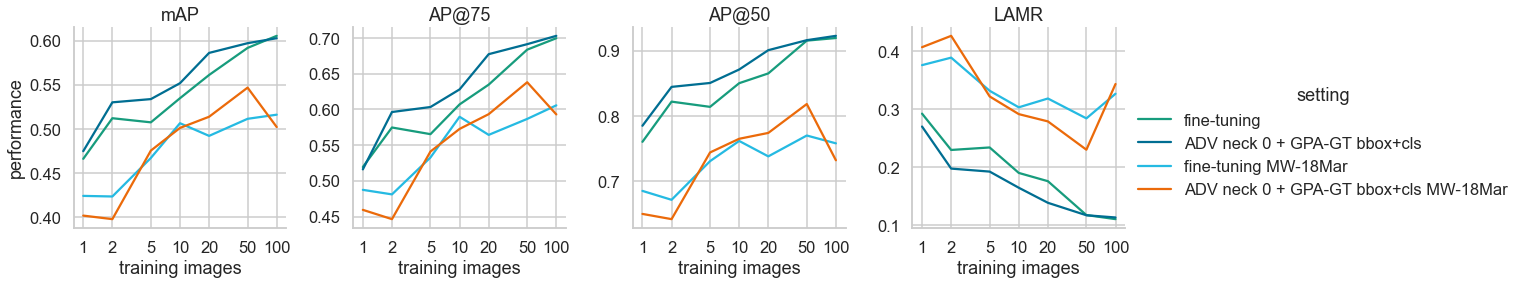

In [15]:
import matplotlib as mpl

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
# hue_order = ['fine-tuning', 'GPA-GT bbox+cls', 'ADV neck 0', 'ADV neck 0 + GPA-GT bbox+cls']
g = sb.relplot(
    data=df[(df['setting'].isin(['fine-tuning', 'fine-tuning MW-18Mar', 'ADV neck 0 + GPA-GT bbox+cls', 'ADV neck 0 + GPA-GT bbox+cls MW-18Mar']))
            & (df['size'] <= 100)],
    x='size',
    y='value',
    col='metric',
    hue='setting',
    # hue_order=hue_order,
    kind='line',
    err_style=None,
    facet_kws={
        'sharey': False,
        'sharex': True
    },
    height=4,
    aspect=1)
# baseline reference line
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.axhline(list(baseline.values())[i], ls='--', c='.5')  #, dashes=(2,1), zorder=0)
#     ax.text(4, list(baseline.values())[i] + (-0.04 if i == 3 else 0.01), 'without fine-tuning', c='.5')
# labels
g.set_xlabels('training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
# g.add_legend({'after fine-tuning': axes[0].lines[0], 'without fine-tuning': axes[0].lines[1]})
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
# g.set_xticklabels(rotation=90)
g.savefig(f'images/sweep_gpa_adv_piropo_vs_mw.svg')

In [60]:
ft = df[(df['setting'] == 'fine-tuning') & (df['size'] <= 100) & (df['metric'] == 'AP@50')].groupby('size').mean()
gpa = df[(df['setting'] == 'ADV neck 0 + GPA-GT bbox+cls') & (df['size'] <= 100) & (df['metric'] == 'AP@50')].groupby('size').mean()
(gpa - ft).mean()

value    0.020905
dtype: float64

## in each category

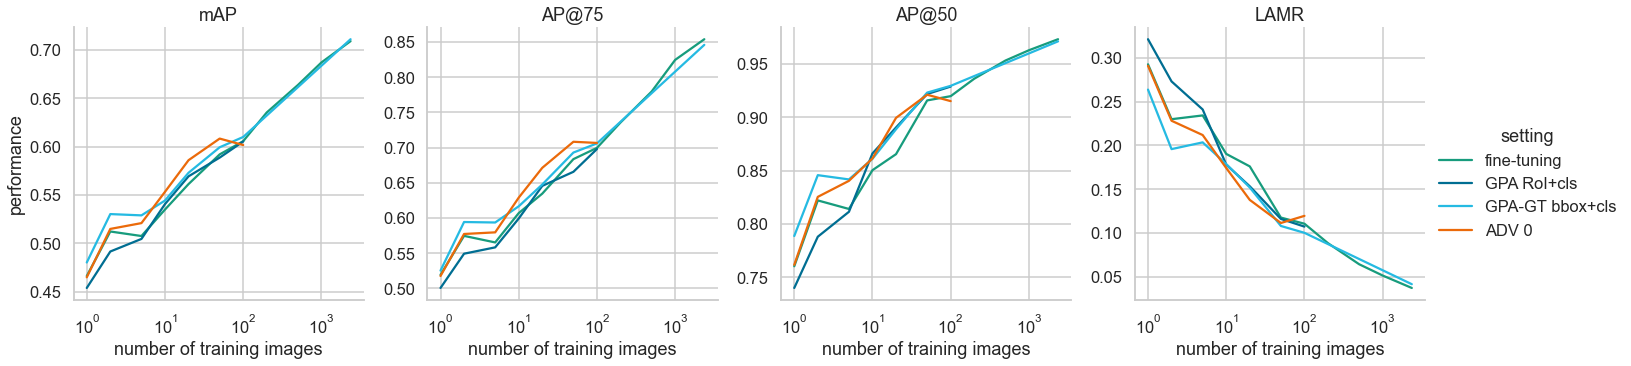

In [8]:
sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())

g = sb.relplot(data=df[df['setting'].isin(['fine-tuning', 'GPA RoI+cls', 'GPA-GT bbox+cls', 'ADV 0'])],
               x='size',
               y='value',
               col='metric',
               hue='setting',
               kind='line',
               err_style=None,
               facet_kws={
                   'sharey': False,
                   'sharex': True
               })
g.set_xlabels('number of training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
plt.xscale('log')

# baseline

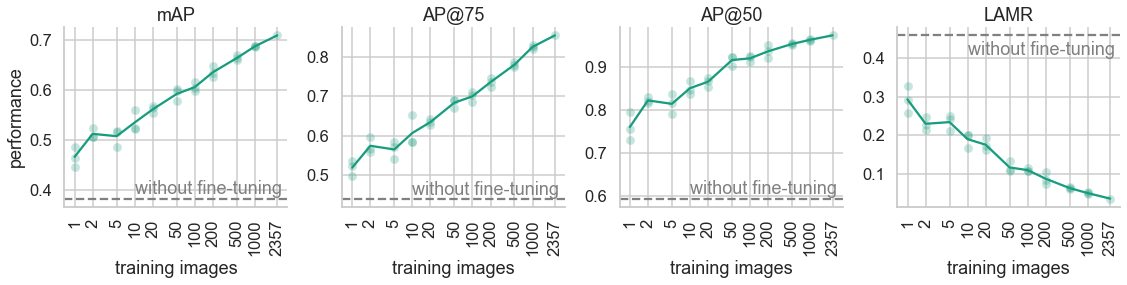

In [12]:
import matplotlib as mpl

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
g = sb.FacetGrid(df[df['setting'].isin(['fine-tuning'])], col='metric', sharey=False, sharex=True, height=4, aspect=1)
# scatterplot with transparency
g.map(sb.scatterplot, 'size', 'value', alpha=0.25)
# lineplot without error bars
g.map(sb.lineplot, 'size', 'value', err_style=None)
# baseline reference line
axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.axhline(list(baseline.values())[i], ls ='--', c='.5') #, dashes=(2,1), zorder=0)
    ax.text(10, list(baseline.values())[i] + (-0.05 if i == 3 else 0.01), 'without fine-tuning', c='.5')
# labels
g.set_xlabels('training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
# g.add_legend({'after fine-tuning': axes[0].lines[0], 'without fine-tuning': axes[0].lines[1]})
plt.xscale('log')
sizes = [1,2,5,10,20,50,100,200,500,1000,2357]
g.set(xticks=sizes, xticklabels=sizes)
g.set_xticklabels(rotation=90)
g.savefig(f'images/baseline_piropo.svg')

# GPA

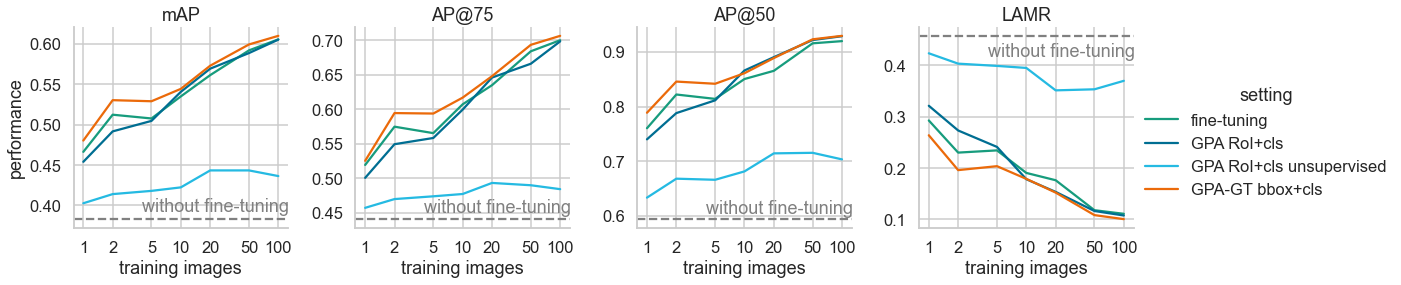

In [27]:
import matplotlib as mpl

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
hue_order = ['fine-tuning', 'GPA RoI+cls', 'GPA RoI+cls unsupervised', 'GPA-GT bbox+cls']
g = sb.relplot(data=df[(df['setting'].isin(['fine-tuning', 'GPA RoI+cls', 'GPA RoI+cls unsupervised', 'GPA-GT bbox+cls']))
                       & (df['size'] <= 100)],
               x='size',
               y='value',
               col='metric',
               hue='setting',
               hue_order=hue_order,
               kind='line',
               err_style=None,
               facet_kws={
                   'sharey': False,
                   'sharex': True
               },
               height=4,
            aspect=1)
# baseline reference line
axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.axhline(list(baseline.values())[i], ls ='--', c='.5') #, dashes=(2,1), zorder=0)
    ax.text(4, list(baseline.values())[i] + (-0.04 if i == 3 else 0.01), 'without fine-tuning', c='.5')
# labels
g.set_xlabels('training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
# g.add_legend({'after fine-tuning': axes[0].lines[0], 'without fine-tuning': axes[0].lines[1]})
plt.xscale('log')
sizes = [1,2,5,10,20,50,100]
g.set(xticks=sizes, xticklabels=sizes)
# g.set_xticklabels(rotation=90)
g.savefig(f'images/sweep_gpa_piropo.svg')

In [47]:
ft = df[(df['setting'] == 'fine-tuning') & (df['size'] <= 100) & (df['metric'] == 'AP@50')].groupby('size').mean()
gpa = df[(df['setting'] == 'GPA-GT bbox+cls') & (df['size'] <= 100) & (df['metric'] == 'AP@50')].groupby('size').mean()
(gpa - ft).mean()

value    0.018667
dtype: float64

## without ground-truth

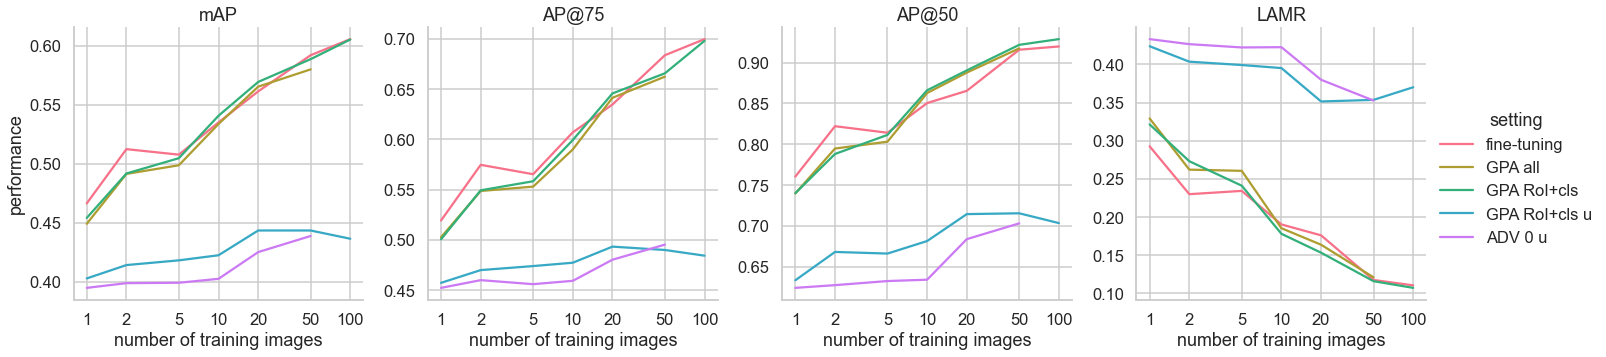

In [3]:
sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())

g = sb.relplot(data=df[(df['setting'].isin(['fine-tuning', 'GPA all', 'GPA RoI+cls', 'GPA RoI+cls u', 'ADV 0 u'])) & (df['size'] <= 100)],
               x='size',
               y='value',
               col='metric',
               hue='setting',
               kind='line',
               err_style=None,
               facet_kws={
                   'sharey': False,
                   'sharex': True
               })
axes = g.axes.flatten()
g.set_xlabels('number of training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
plt.xscale('log')
sizes = [1,2,5,10,20,50,100]
g.set(xticks=sizes, xticklabels=sizes)

## with ground-truth

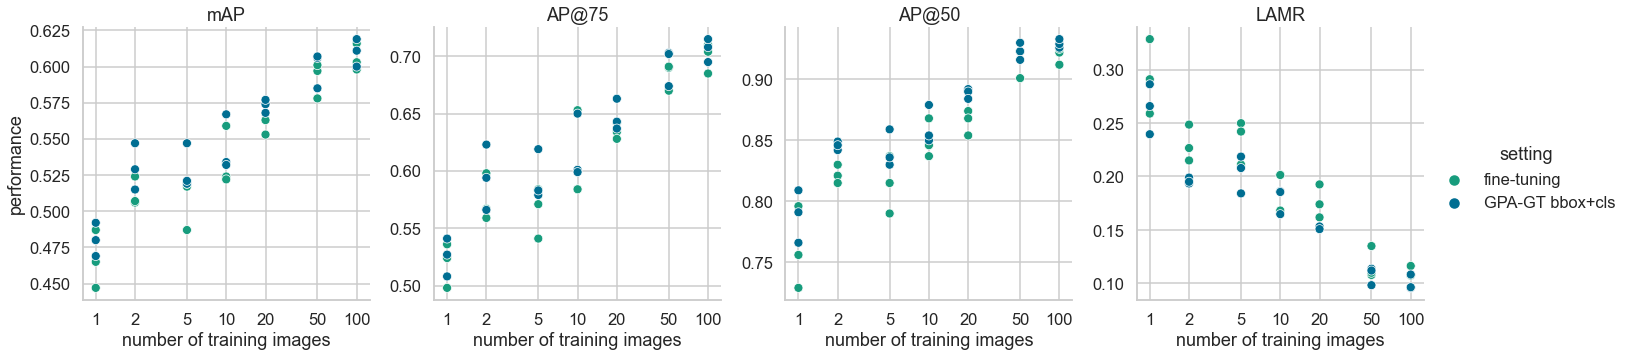

In [56]:
sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())

g = sb.relplot(data=df[(df['setting'].isin(['fine-tuning', 'GPA-GT all', 'GPA-GT bbox+cls'])) & (df['size'] <= 100)],
               x='size',
               y='value',
               col='metric',
               hue='setting',
               kind='line',
               err_style=None,
               facet_kws={
                   'sharey': False,
                   'sharex': True
               })
g.set_xlabels('number of training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)

# adversarial

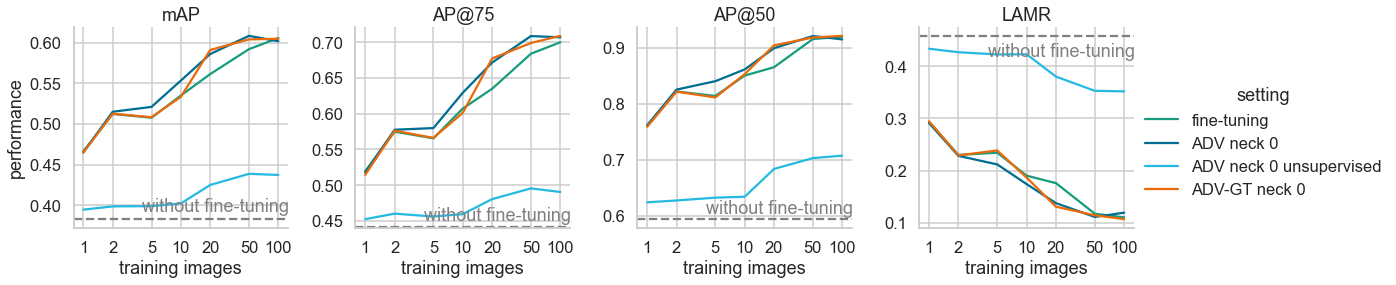

In [30]:
import matplotlib as mpl

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
hue_order = ['fine-tuning', 'ADV neck 0', 'ADV neck 0 unsupervised', 'ADV-GT neck 0']
g = sb.relplot(
    data=df[(df['setting'].isin(['fine-tuning', 'ADV neck 0', 'ADV neck 0 unsupervised', 'ADV-GT neck 0']))
            & (df['size'] <= 100)],
    x='size',
    y='value',
    col='metric',
    hue='setting',
    hue_order=hue_order,
    kind='line',
    err_style=None,
    facet_kws={
        'sharey': False,
        'sharex': True
    },
    height=4,
    aspect=1)
# baseline reference line
axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.axhline(list(baseline.values())[i], ls='--', c='.5')  #, dashes=(2,1), zorder=0)
    ax.text(4, list(baseline.values())[i] + (-0.04 if i == 3 else 0.01), 'without fine-tuning', c='.5')
# labels
g.set_xlabels('training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
# g.add_legend({'after fine-tuning': axes[0].lines[0], 'without fine-tuning': axes[0].lines[1]})
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
# g.set_xticklabels(rotation=90)
g.savefig(f'images/sweep_adv_piropo.svg')

In [51]:
ft = df[(df['setting'] == 'fine-tuning') & (df['size'] <= 100) & (df['metric'] == 'AP@50')].groupby('size').mean()
adv = df[(df['setting'] == 'ADV neck 0') & (df['size'] <= 100) & (df['metric'] == 'AP@50')].groupby('size').mean()
(adv - ft).mean()

value    0.010952
dtype: float64

## whether to use pretraining

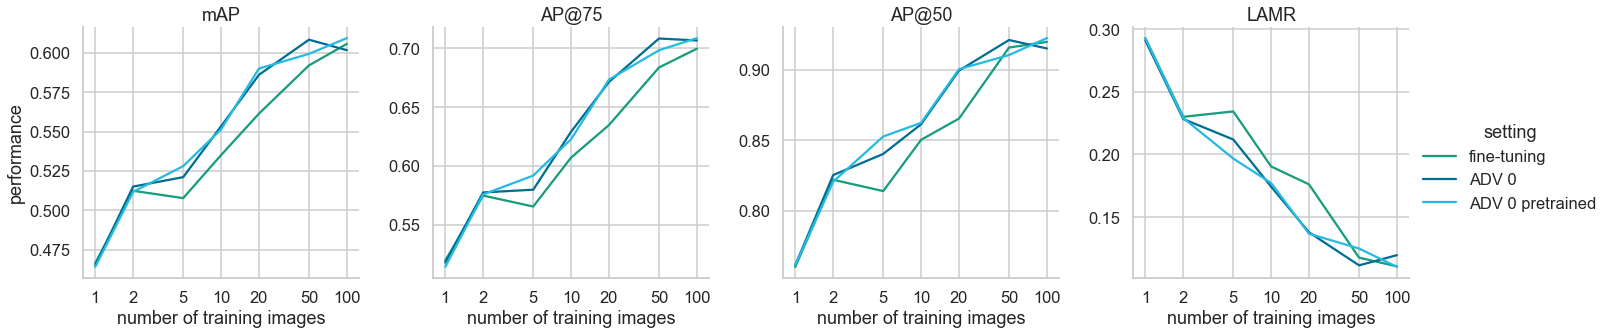

In [20]:
sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())

# facet grid with individual x-axis
g = sb.FacetGrid(df[(df['setting'].isin(['fine-tuning', 'ADV 0', 'ADV 0 pretrained'])) & (df['size'] <= 100)],
                 col='metric',
                 hue='setting',
                 sharey=False,
                 sharex=True,
                 height=5,
                 aspect=1)
# scatterplot with transparency
# g.map(sb.scatterplot, 'size', 'value', alpha=0.75)
# lineplot without error bars
g.map(sb.lineplot, 'size', 'value', err_style=None)
g.set_xlabels('number of training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)

## without ground-truth

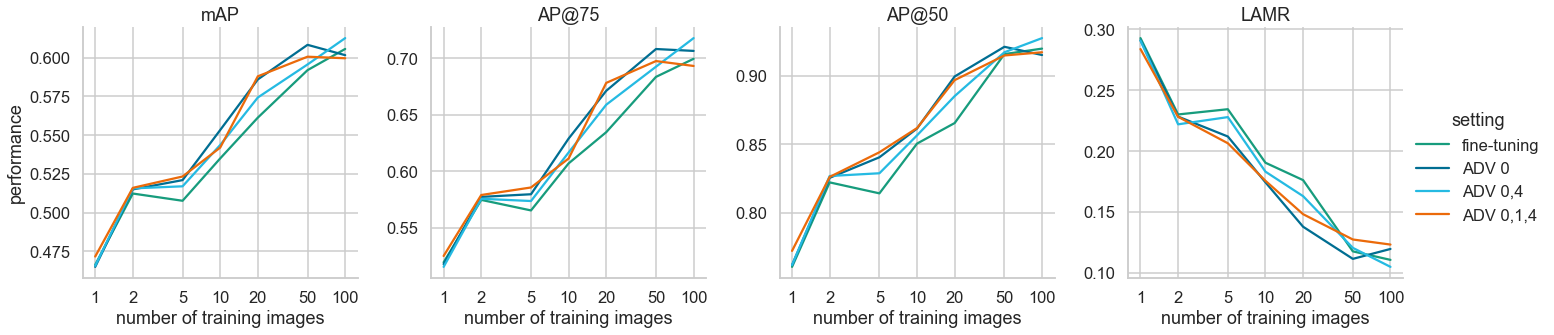

In [6]:
sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())

# facet grid with individual x-axis
g = sb.FacetGrid(df[(df['setting'].isin(['fine-tuning', 'ADV 0', 'ADV 0,4', 'ADV 0,1,4'])) & (df['size'] <= 100)],
                 col='metric',
                 hue='setting',
                 sharey=False,
                 sharex=True,
                 height=5,
                 aspect=1)
# scatterplot with transparency
# g.map(sb.scatterplot, 'size', 'value', alpha=0.75)
# lineplot without error bars
g.map(sb.lineplot, 'size', 'value', err_style=None)
g.set_xlabels('number of training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)

## with ground-truth

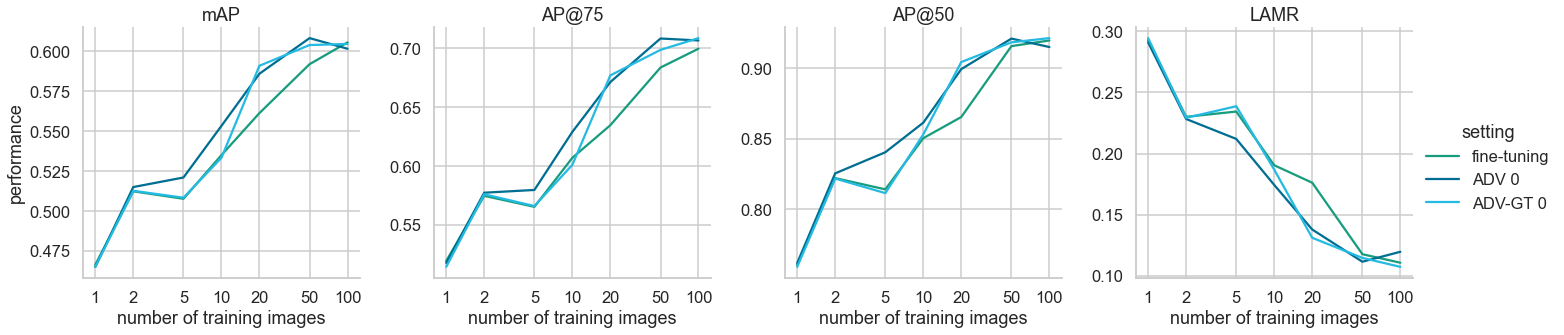

In [3]:
sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())

# facet grid with individual x-axis
g = sb.FacetGrid(df[(df['setting'].isin(['fine-tuning', 'ADV 0', 'ADV-GT 0'])) & (df['size'] <= 100)],
                 col='metric',
                 hue='setting',
                 sharey=False,
                 sharex=True,
                 height=5,
                 aspect=1)
# scatterplot with transparency
# g.map(sb.scatterplot, 'size', 'value', alpha=0.75)
# lineplot without error bars
g.map(sb.lineplot, 'size', 'value', err_style=None)
g.set_xlabels('number of training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)

# adaptation is worth x images

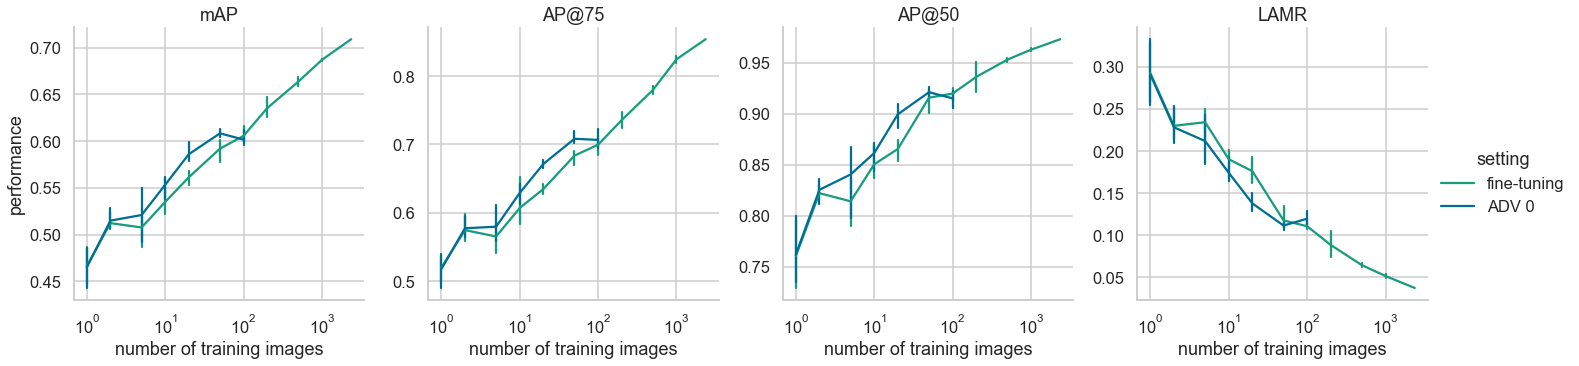

In [185]:
sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())

g = sb.relplot(data=df[df['setting'].isin(['fine-tuning', 'ADV 0'])],
               x='size',
               y='value',
               col='metric',
               hue='setting',
               kind='line',
               err_style='bars',
               facet_kws={
                   'sharey': False,
                   'sharex': True
               })
g.set_xlabels('number of training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
plt.xscale('log')

In [8]:
def get_xy_from_df(setting, metric, size=3000):
    # get all entries belonging to setting and metric
    ft = df[(df['setting'] == setting) & (df['metric'] == metric) & (df['size'] <= size)]
    # only extract size and value columns
    ft = ft[['size', 'value']]
    # average over multiple entries with same size
    ft = ft.groupby(['size']).mean()
    # reset index to make size its own column again
    ft = ft.reset_index()
    # convert to array
    ft = ft.to_numpy()
    # convert to x, y series
    return ft


def get_delta_and_quotient(curve1, curve2):
    deltas = []
    quotients = []
    quotients_log = []
    quotients_min = []
    quotients_max = []

    for x, y in curve2:
        # determine whether point lies above or below curve 1
        idx = np.where(curve1[:, 0] == x)[0][0]
        if y < curve1[idx][1]:
            # find first point on curve 1 that lies below current point, and point just after that
            idx = np.where(curve1[:, 1] < y)[0][-1]
            xl, yl = curve1[idx, :]
            xu, yu = curve1[idx + 1, :]
        else:
            # find first point on curve 1 that lies above current point, and point just before that
            idx = np.where(curve1[:, 1] >= y)[0][0]
            xl, yl = curve1[idx - 1, :]
            xu, yu = curve1[idx, :]

        # interpolate to find x-value on curve 1 that corresponds to y
        f = (y - yl) / (yu - yl)
        _x = xl + (xu - xl) * f
        _x_log = xl * ((xu / xl) ** f)

        # calculate delta x
        deltas.append(_x - x)
        quotients.append(_x / x)
        quotients_log.append(_x_log / x)
        quotients_min.append(xl / x)
        quotients_max.append(xu / x)
        # print('projected x:', _x, 'Δx:', _x - x, 'Qx:', _x / x)

    return ({
        'mean Qx': np.mean(quotients),
        'mean log-Qx': np.mean(quotients_log),
        'min Qx': np.mean(quotients_min),
        'max Qx': np.mean(quotients_max),
        'mean Δx': np.mean(deltas),
        'median Δx': np.median(deltas),
        'median Qx': np.median(quotients),
        'deltas': deltas,
        'quotients': quotients,
        'log-quotients': quotients_log,
        'min quotients': quotients_min,
        'max quotients': quotients_max
    })


def quantify_improvement(setting_from, setting_to, metric, size=3000):
    return get_delta_and_quotient(get_xy_from_df(setting_from, metric), get_xy_from_df(setting_to, metric, size))

# ft = get_xy_from_df('fine-tuning', 'AP@50')
# adv = get_xy_from_df('ADV 0', 'AP@50')

In [61]:
quantify_improvement('fine-tuning', 'ADV neck 0 + GPA-GT bbox+cls', 'AP@50', 100)['mean log-Qx']

2.0488678983638473

In [52]:
quantify_improvement('fine-tuning', 'ADV neck 0', 'AP@50', 100)['mean log-Qx']

1.7001432011062292

In [49]:
quantify_improvement('fine-tuning', 'GPA-GT bbox+cls', 'AP@50', 100)

{'mean Qx': 2.18661454020832,
 'mean log-Qx': 2.0888163476911963,
 'min Qx': 1.3571428571428572,
 'max Qx': 2.7857142857142856,
 'mean Δx': 23.176404241165137,
 'median Δx': 7.357798165137609,
 'median Qx': 1.7111111111111135,
 'deltas': [0.4594594594594623,
  7.357798165137609,
  3.807339449541278,
  7.111111111111136,
  13.907284768211873,
  70.40816326530609,
  59.18367346938851],
 'quotients': [1.4594594594594623,
  4.678899082568805,
  1.7614678899082556,
  1.7111111111111135,
  1.6953642384105936,
  2.4081632653061216,
  1.591836734693885],
 'log-quotients': [1.3750265347136885,
  4.574099433420943,
  1.6952145669244694,
  1.6370644390599662,
  1.5292394769830773,
  2.30390564392499,
  1.5071643388112397],
 'min quotients': [1.0, 2.5, 1.0, 1.0, 1.0, 2.0, 1.0],
 'max quotients': [2.0, 5.0, 2.0, 2.0, 2.5, 4.0, 2.0]}

<AxesSubplot:>

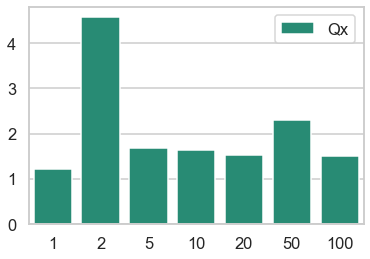

In [6]:
data = {
    'x': [1, 2, 5, 10, 20, 50, 100],
    'y': [
        1.2265402641232137, 4.574099433420943, 1.6952145669244694, 1.6370644390599662, 1.5292394769830773,
        2.30390564392499, 1.5071643388112397
    ],
    'category': ['Qx', 'Qx', 'Qx', 'Qx', 'Qx', 'Qx', 'Qx']
}

sb.barplot(x='x', y='y', hue='category', data=data)

# significance test
## paired Student's t-test
Consider each split its own category, e.g. `1a`, `1b`, ... and test for whole range 1 - 100.

OR

Test each size individually and consider each split `a`, `b`, `c` its own category.

In [41]:
from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'


def get_res_per_cat(setting, metric, size, name):
    data = df[(df['setting'] == setting) & (df['metric'] == metric) & (df['size'] <= size)]
    # merge `size` and `split` into category
    data['category'] = data['size'].astype(str) + data['split'].astype(str)
    # reset index
    data = data[['category', 'value']].reset_index(drop=True)
    # rename value column
    data = data.rename(columns={'value': name})
    return data

# combine before/after results in one dataframe
before = get_res_per_cat('fine-tuning', 'AP@50', 100, 'before')
after = get_res_per_cat('GPA-GT bbox+cls', 'AP@50', 100, 'after')
data = pd.merge(before, after, on='category')

print("Paired Student's t-Test Across Sizes")
data[['before', 'after']].describe()

# results are only valid if p < 0.05 for both
print("  use Shapiro-Wilk test to check whether")
print("  data before/after follows normal distribution:")
print('    before', stats.shapiro(data['before']))
print('    after', stats.shapiro(data['after']))

# actual test
print("  paired t-test:")
print("   ", stats.ttest_rel(data['before'], data['after']))

Paired Student's t-Test on Across Sizes
  use Shapiro-Wilk test to check whether
  data before/after follows normal distribution:
    before ShapiroResult(statistic=0.9488013386726379, pvalue=0.32326576113700867)
    after ShapiroResult(statistic=0.9447492361068726, pvalue=0.27007895708084106)
  paired t-test:
    Ttest_relResult(statistic=-5.378651252767091, pvalue=2.896552343607744e-05)


In [54]:
from scipy import stats

pd.options.mode.chained_assignment = None  # default='warn'


def get_res_per_cat(setting, metric, size, name):
    data = df[(df['setting'] == setting) & (df['metric'] == metric) & (df['size'] <= size)]
    # reset index
    data = data[['size', 'split', 'value']].reset_index(drop=True)
    # rename value column
    data = data.rename(columns={'value': name})
    return data


# combine before/after results in one dataframe
before = get_res_per_cat('fine-tuning', 'AP@50', 100, 'before')
after = get_res_per_cat('GPA-GT bbox+cls', 'AP@50', 100, 'after')
data = pd.merge(before, after, on=['size', 'split'])

print("Paired Student's t-Test per Size")
# data[['before', 'after']].describe()

for s in data['size'].unique():
    print(f'  N = {s}')
    shap_bef = stats.shapiro(data[data['size'] == s]['before'])[1]
    shap_aft = stats.shapiro(data[data['size'] == s]['after'])[1]
    print(f"    Shapiro-Wilk before: {'yes' if shap_bef > 0.05 else f'no {shap_bef}'}, after: {'yes' if shap_aft > 0.05 else 'no'}")
    print("     ", stats.ttest_rel(data[data['size'] == s]['before'], data[data['size'] == s]['after']))


# # results are only valid if p < 0.05 for both
# print("  use Shapiro-Wilk test to check whether")
# print("  data before/after follows normal distribution:")
# print('    before', stats.shapiro(data['before']))
# print('    after', stats.shapiro(data['after']))

# # actual test
# print("  paired t-test:")
# print("   ", stats.ttest_rel(data['before'], data['after']))

Paired Student's t-Test per Size
  N = 1
    Shapiro-Wilk before: yes, after: yes
      Ttest_relResult(statistic=-1.6382546070448618, pvalue=0.24303011271087469)
  N = 2
    Shapiro-Wilk before: yes, after: yes
      Ttest_relResult(statistic=-6.375988221950508, pvalue=0.023726355586351822)
  N = 5
    Shapiro-Wilk before: yes, after: yes
      Ttest_relResult(statistic=-1.9239992827944201, pvalue=0.19425070330148722)
  N = 10
    Shapiro-Wilk before: yes, after: yes
      Ttest_relResult(statistic=-7.341303483857978, pvalue=0.01805374090845507)
  N = 20
    Shapiro-Wilk before: yes, after: yes
      Ttest_relResult(statistic=-3.668996928526714, pvalue=0.06691545604422627)
  N = 50
    Shapiro-Wilk before: no -9.106917104872991e-07, after: yes
      Ttest_relResult(statistic=-1.6923076923076923, pvalue=0.23266188294332862)
  N = 100
    Shapiro-Wilk before: yes, after: yes
      Ttest_relResult(statistic=-2.514618911619948, pvalue=0.1283860198214821)


# MW-18Mar

In [2]:
from log_analysis import *

baseline_mw = {'mAP': .001, 'AP@75': .0, 'AP@50': .007, 'LAMR': .9914}

sweeps_mw = {}

sizes = [1, 2, 5, 10, 20, 50, 100, 200, 'all']
sweeps_mw['fine-tuning'] = df_from_sweep('sweeps_mw/fine-tune', sizes, all_size=819)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps_mw['ADV neck 0 + GPA-GT bbox+cls'] = df_from_sweep('sweeps_mw/adv_0_gpa_-xg', sizes)

sizes = [1,2,5,10,20,50,100]
sweeps_mw['fine-tuning PIROPO'] = df_from_sweep('sweeps_mw/fine-tune_piropo', sizes, alt_pattern=True)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps_mw['ADV neck 0 + GPA-GT bbox+cls PIROPO'] = df_from_sweep('sweeps_mw/adv_0_gpa_-xg_piropo', sizes, alt_pattern=True)

df_mw = pd.concat(sweeps_mw.values(), keys=sweeps_mw.keys()).rename_axis(['setting', None]).reset_index(level=0)
df_mw.replace(['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50'], ['mAP', 'AP@75', 'AP@50'], inplace=True)
df_mw.head()


no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log
no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log
no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log
no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log


,setting,size,split,metric,value
0,fine-tuning,1,a,mAP,0.522
1,fine-tuning,1,b,mAP,0.479
2,fine-tuning,1,c,mAP,0.479
3,fine-tuning,2,a,mAP,0.406
4,fine-tuning,2,b,mAP,0.501


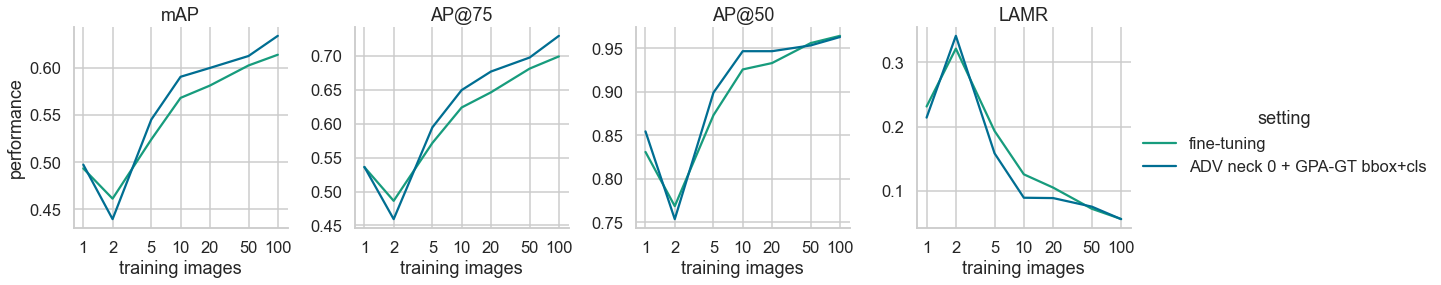

In [5]:
import matplotlib as mpl

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
# hue_order = ['fine-tuning', 'GPA-GT bbox+cls', 'ADV neck 0', 'ADV neck 0 + GPA-GT bbox+cls']
g = sb.relplot(
    data=df_mw[(df_mw['setting'].isin(['fine-tuning', 'ADV neck 0 + GPA-GT bbox+cls']))
            & (df_mw['size'] <= 100)],
    x='size',
    y='value',
    col='metric',
    hue='setting',
    # hue_order=hue_order,
    kind='line',
    err_style=None,
    facet_kws={
        'sharey': False,
        'sharex': True
    },
    height=4,
    aspect=1)
# baseline reference line
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.axhline(list(baseline.values())[i], ls='--', c='.5')  #, dashes=(2,1), zorder=0)
#     ax.text(4, list(baseline.values())[i] + (-0.04 if i == 3 else 0.01), 'without fine-tuning', c='.5')
# labels
g.set_xlabels('training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
# g.add_legend({'after fine-tuning': axes[0].lines[0], 'without fine-tuning': axes[0].lines[1]})
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
# g.set_xticklabels(rotation=90)
g.savefig(f'images/sweep_gpa_adv_mw18mar.svg')

In [6]:
ft = df_mw[(df_mw['setting'] == 'fine-tuning') & (df_mw['size'] <= 100) & (df_mw['metric'] == 'AP@50')].groupby('size').mean()
gpa = df_mw[(df_mw['setting'] == 'ADV neck 0 + GPA-GT bbox+cls') & (df_mw['size'] <= 100) &
            (df_mw['metric'] == 'AP@50')].groupby('size').mean()
(gpa - ft).mean()

value    0.009333
dtype: float64

In [9]:
def get_xy_from_df(setting, metric, size=3000):
    # get all entries belonging to setting and metric
    ft = df_mw[(df_mw['setting'] == setting) & (df_mw['metric'] == metric) & (df_mw['size'] <= size)]
    # only extract size and value columns
    ft = ft[['size', 'value']]
    # average over multiple entries with same size
    ft = ft.groupby(['size']).mean()
    # reset index to make size its own column again
    ft = ft.reset_index()
    # convert to array
    ft = ft.to_numpy()
    # convert to x, y series
    return ft


def get_delta_and_quotient(curve1, curve2):
    deltas = []
    quotients = []
    quotients_log = []
    quotients_min = []
    quotients_max = []

    for x, y in curve2:
        # determine whether point lies above or below curve 1
        idx = np.where(curve1[:, 0] == x)[0][0]
        if y < curve1[idx][1]:
            # find first point on curve 1 that lies below current point, and point just after that
            idx = np.where(curve1[:, 1] < y)[0][-1]
            xl, yl = curve1[idx, :]
            xu, yu = curve1[idx + 1, :]
        else:
            # find first point on curve 1 that lies above current point, and point just before that
            idx = np.where(curve1[:, 1] >= y)[0][0]
            xl, yl = curve1[idx - 1, :]
            xu, yu = curve1[idx, :]

        # interpolate to find x-value on curve 1 that corresponds to y
        f = (y - yl) / (yu - yl)
        _x = xl + (xu - xl) * f
        _x_log = xl * ((xu / xl) ** f)

        # calculate delta x
        deltas.append(_x - x)
        quotients.append(_x / x)
        quotients_log.append(_x_log / x)
        quotients_min.append(xl / x)
        quotients_max.append(xu / x)
        # print('projected x:', _x, 'Δx:', _x - x, 'Qx:', _x / x)

    return ({
        'mean Qx': np.mean(quotients),
        'mean log-Qx': np.mean(quotients_log),
        'min Qx': np.mean(quotients_min),
        'max Qx': np.mean(quotients_max),
        'mean Δx': np.mean(deltas),
        'median Δx': np.median(deltas),
        'median Qx': np.median(quotients),
        'deltas': deltas,
        'quotients': quotients,
        'log-quotients': quotients_log,
        'min quotients': quotients_min,
        'max quotients': quotients_max
    })


def quantify_improvement(setting_from, setting_to, metric, size=3000):
    return get_delta_and_quotient(get_xy_from_df(setting_from, metric), get_xy_from_df(setting_to, metric, size))

# ft = get_xy_from_df('fine-tuning', 'AP@50')
# adv = get_xy_from_df('ADV 0', 'AP@50')

In [10]:
quantify_improvement('fine-tuning', 'ADV neck 0 + GPA-GT bbox+cls', 'AP@50', 100)['mean log-Qx']

IndexError: index -1 is out of bounds for axis 0 with size 0

## cross-dataset performance

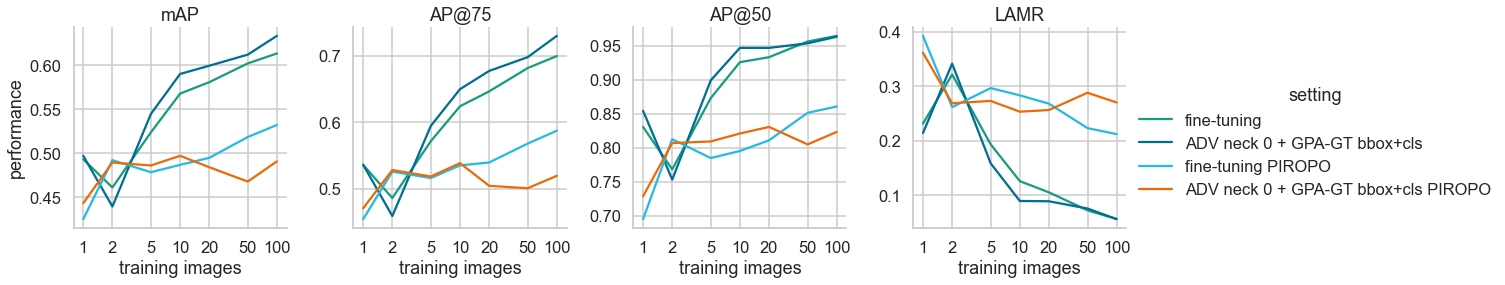

In [11]:
import matplotlib as mpl

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())
mpl.rcParams['font.family'] = 'Arial'

# facet grid with individual x-axis
# hue_order = ['fine-tuning', 'GPA-GT bbox+cls', 'ADV neck 0', 'ADV neck 0 + GPA-GT bbox+cls']
g = sb.relplot(
    data=df_mw[(df_mw['setting'].isin(['fine-tuning', 'fine-tuning PIROPO', 'ADV neck 0 + GPA-GT bbox+cls', 'ADV neck 0 + GPA-GT bbox+cls PIROPO']))
               & (df_mw['size'] <= 100)],
    x='size',
    y='value',
    col='metric',
    hue='setting',
    # hue_order=hue_order,
    kind='line',
    err_style=None,
    facet_kws={
        'sharey': False,
        'sharex': True
    },
    height=4,
    aspect=1)
# baseline reference line
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.axhline(list(baseline.values())[i], ls='--', c='.5')  #, dashes=(2,1), zorder=0)
#     ax.text(4, list(baseline.values())[i] + (-0.04 if i == 3 else 0.01), 'without fine-tuning', c='.5')
# labels
g.set_xlabels('training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
# g.add_legend({'after fine-tuning': axes[0].lines[0], 'without fine-tuning': axes[0].lines[1]})
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
# g.set_xticklabels(rotation=90)
g.savefig(f'images/sweep_gpa_adv_mw18mar_vs_piropo.svg')